In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets list


ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                    Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          23640        551  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets          Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          13594        240  1.0              
rohitgrewal/airlines-flights-data                              Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          23241        413  1.0              
praty


# **Assignment: Build Your First Image Classifier with a CNN**

Welcome to your first hands-on assignment! In this notebook, you will build a complete Convolutional Neural Network (CNN) from scratch to classify images of cats and dogs.

**Your goal is to complete the sections marked with `TODO`.** You will be responsible for defining the data generators, building the core CNN architecture, compiling it, and training it.


### **0. Getting Started: Environment Setup & Requirements**

Before you begin, you need to set up your environment. We highly recommend using Google Colab for this assignment as it provides a free GPU, which will make training your model much faster.

#### **Instructions for Google Colab (Recommended):**

1.  **Open in Colab:** Make sure you have this notebook open in Google Colab.
2.  **Enable GPU:**
    *   Go to the menu: `Runtime` -> `Change runtime type`.
    *   In the "Hardware accelerator" dropdown, select **`GPU`** and click `Save`. This is crucial for deep learning!

#### **Kaggle API Setup (Required for Everyone):**

This notebook downloads its dataset directly from Kaggle. To do this, you need a Kaggle API token.

1.  **Get your Token:**
    *   Go to your Kaggle account page: [https://www.kaggle.com/me/account](https://www.kaggle.com/me/account)
    *   Scroll down to the "API" section.
    *   Click on **`Create New API Token`**. This will download a file named `kaggle.json`.

2.  **Upload to Colab:**
    *   On the left-hand side of your Colab window, click the **folder icon** to open the file browser.
    *   Click the **`Upload to session storage`** icon (it looks like a page with an up arrow).
    *   Select the `kaggle.json` file you just downloaded.

You are now ready to begin! The code in the next few cells will automatically move this `kaggle.json` file to the correct location for the Kaggle API to find it.


# **1. Data Preparation**


In this first major step, we will download our data, unzip it, and organize it into a clean directory structure. A well-organized dataset is the foundation of any successful machine learning project.



#### **1.1 Imports**
We'll start by importing all the essential libraries we will need.


**TensorFlow**: Imports the TensorFlow library for machine learning.

**Keras**: Imports the high-level Keras API from TensorFlow.

**NumPy:** Imports the NumPy library for numerical computations.

**Matplotlib:** Imports the Matplotlib library for data visualization.



In [5]:
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint as MCP, EarlyStopping as ES
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#### **1.2. Load and Extract the Data**
Now, let's download the dataset from Kaggle and unzip it. The following code cells will handle this for you that :

Loads dataset using Kaggle API
```
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
```

Also creates a dir 'kaggle' inside '/content/' to store
* kaggle.json
* Testing & Training data


In [6]:
#making a dir kaggle in the content folder
os.mkdir("/content/kaggle/")



In [7]:
#shifting data of kaggle.json into newly created  dir
copyfile("/content/kaggle.json","/content/kaggle/kaggle.json")


'/content/kaggle/kaggle.json'

In [8]:

!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
100% 784M/788M [00:11<00:00, 120MB/s] 
100% 788M/788M [00:11<00:00, 73.3MB/s]



#### **1.3. Creating a Structured Workspace**
Machine learning models, especially in Keras, work best when your data is organized. We need a main directory with `Train` and `Test` sub-folders, and inside each of those, a separate folder for each class (`Cats` and `Dogs`). The code below builds this structure for us.

But note that After downloading the dataset from Kaggle, it arrives as a compressed ZIP file. To use the dataset in our project, we need to extract the files from this ZIP archive. The following steps illustrate how this is done using Python's `zipfile` module:

1. **Importing the `zipfile` Module**:
   - The `zipfile` module is imported and given the alias `z`. This module provides tools for reading and writing ZIP files.

2. **Opening the ZIP File**:
   - A `ZipFile` object is created to access the ZIP file located at `'/content/microsoft-catsvsdogs-dataset.zip'`. This object represents the ZIP archive and allows us to interact with its contents.

3. **Extracting the Files**:
   - The `extractall()` method is used to unpack all the files from the ZIP archive into the current working directory. This step makes the contents of the ZIP file accessible for further processing.

4. **Closing the ZIP File**:
   - After extraction, the `close()` method is called to close the `ZipFile` object. This is an important step to release system resources and avoid potential issues with file handling.

By executing these steps, the dataset is extracted and ready for use in training and evaluating our CNN model for classifying images of cats and dogs.


In [9]:
import zipfile as z
zp=z.ZipFile('/content/microsoft-catsvsdogs-dataset.zip')
zp.extractall()
zp.close()


To organize the dataset effectively for training and testing our Convolutional Neural Network (CNN), we need to create a structured directory hierarchy. This hierarchy will help us manage and access the images for both training and testing purposes.

Here's the Explanation of the Code

1. **Creating the Main Directory**:
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs")`: This command creates a top-level directory named `Cats-vs-Dogs` within the `/content/kaggle/` path. This directory will serve as the root folder for our dataset organization.

2. **Creating Subdirectories for Training and Testing**:
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/")`: This creates a `Train` folder inside the `Cats-vs-Dogs` directory, which will hold the training images.
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/")`: Similarly, this creates a `Test` folder inside the `Cats-vs-Dogs` directory for storing testing images.

3. **Creating Category-Specific Folders in Training Data**:
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/Cats")`: This creates a `Cats` folder inside the `Train` directory to store images of cats used for training.
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/Dogs")`: This creates a `Dogs` folder inside the `Train` directory to store images of dogs used for training.

4. **Creating Category-Specific Folders in Testing Data**:
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/Cats")`: This creates a `Cats` folder inside the `Test` directory for storing testing images of cats.
   - `os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/Dogs")`: This creates a `Dogs` folder inside the `Test` directory for storing testing images of dogs.



In [10]:
#making directories for testing & training data
os.mkdir("/content/kaggle/Cats-vs-Dogs")    #Cats-vs-Dogs folder
os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/")   #Train folder
os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/")    #Test Folder
os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/Cats") # Cats Folder in Training data
os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/Dogs")  # Dogs Folder in Training data
os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/Cats")    # Cats Folder in Testing data
os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/Dogs")    # Dogs Folder in Testing data


In [11]:
#keeping track ofrequired dir
TRAIN='/content/kaggle/Cats-vs-Dogs/Train/'
TEST='/content/kaggle/Cats-vs-Dogs/Test/'

CAT_SOURCE='/content/PetImages/Cat/'
CAT_TRAIN='/content/kaggle/Cats-vs-Dogs/Train/Cats/'
CAT_TEST='/content/kaggle/Cats-vs-Dogs/Test/Cats/'

DOG_SOURCE='/content/PetImages/Dog/'
DOG_TRAIN='/content/kaggle/Cats-vs-Dogs/Train/Dogs/'
DOG_TEST='/content/kaggle/Cats-vs-Dogs/Test/Dogs/'

 **Splitting and Organizing Dataset**

This function, `data_spliting`, is designed to split a dataset into training and testing sets and then organize these subsets into their respective directories. The function also ensures that images are correctly copied into the appropriate folders.

 **Function Definition**

```python
def data_spliting(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  ```
  
-   **`SOURCE`**: Path to the directory containing the original dataset.
-   **`TRAINING`**: Path to the directory where training images will be copied.
-   **`TESTING`**: Path to the directory where testing images will be copied.
-   **`SPLIT_SIZE`**: Proportion of the data to be allocated to the training set (e.g., 0.8 for 80%).

 **Detailed Steps**

1.  **Filtering Non-Empty Files**:
    
    -   `file = [filename for filename in os.listdir(SOURCE) if os.path.getsize(SOURCE + filename) > 0]`:
        -   This line creates a list of filenames from the `SOURCE` directory, excluding any files that are empty (i.e., size is greater than 0).
2.  **Calculating Sizes for Splitting**:
    
    -   `train_size = int(len(file) * SPLIT_SIZE)`:
        -   Determines the number of files to include in the training set based on the `SPLIT_SIZE` proportion.
    -   `test_size = int(len(file) * (1 - SPLIT_SIZE))`:
        -   Calculates the number of files for the testing set by subtracting the training proportion from 1.
3.  **Shuffling and Splitting Data**:
    
    -   `shuffled_data = random.sample(file, len(file))`:
        -   Shuffles the list of files randomly to ensure that the split is not biased by the order of files.
    -   `train_data = shuffled_data[0:train_size]`:
        -   Extracts the portion of the shuffled list that will be used for training.
    -   `test_data = shuffled_data[train_size:]`:
        -   Extracts the remaining portion of the shuffled list for testing.
4.  **Copying Files to Training Directory**:
    
    -   `for files in train_data:`:
        -   Iterates over the files designated for training.
        -   `copyfile(SOURCE + files, f"{TRAINING}cat-{files}")`:
            -   Copies each training file from the `SOURCE` directory to the `TRAINING` directory, prefixing the filenames with 'cat-' to identify them.
5.  **Copying Files to Testing Directory**:
    
    -   `for files in test_data:`:
        -   Iterates over the files designated for testing.
        -   `copyfile(SOURCE + files, f"{TESTING}dog-{files}")`:
            -   Copies each testing file from the `SOURCE` directory to the `TESTING` directory, prefixing the filenames with 'dog-' to identify them.

In [12]:
def data_spliting(SOURCE,TRAINING,TESTING,SPLIT_SIZE):
  file=[filename for filename in os.listdir(SOURCE) if os.path.getsize(SOURCE+filename)>0]
  train_size=int(len(file)*SPLIT_SIZE)
  test_size=  int(len(file)*(1-SPLIT_SIZE))
  shuffled_data=random.sample(file,len(file))
  train_data=shuffled_data[0:train_size]
  test_data=shuffled_data[train_size:]

#copying files into dir Train
  for files in train_data:
    copyfile(SOURCE+files, f"{TRAINING}cat-{files}")

#copying files into dir Test

  for files in test_data:
      copyfile(SOURCE+files, f"{TESTING}dog-{files}")

In [13]:
#spliting data of Cats & Dogs by data_spliting(SOURCE,TRAINING,TESTING,SPLIT_SIZE) function
data_spliting(CAT_SOURCE,CAT_TRAIN,CAT_TEST,0.8)
data_spliting(DOG_SOURCE,DOG_TRAIN,DOG_TEST,0.8)

In [14]:
#getting length /size of training data
print(f"There are {len(os.listdir(CAT_TRAIN))} images of cats in the training set")
print(f"There are {len(os.listdir(DOG_TRAIN))} images of dogs in the training set\n{'_'*50}")

#getting length /size of testing data
print(f"There are {len(os.listdir(CAT_TEST))} images of cats in the testing set")
print(f"There are {len(os.listdir(DOG_TEST))} images of dogs in the testing set\n{'_'*50}")
print(f"The space occupied by 'Dogs' dir in testing data is {os.path.getsize(DOG_TEST)} bytes")
print(f"The space occupied by 'Cats' dir in testing data is {os.path.getsize(CAT_TEST)} bytes\n{'_'*50}")


There are 10000 images of cats in the training set
There are 10000 images of dogs in the training set
__________________________________________________
There are 2500 images of cats in the testing set
There are 2500 images of dogs in the testing set
__________________________________________________
The space occupied by 'Dogs' dir in testing data is 69632 bytes
The space occupied by 'Cats' dir in testing data is 69632 bytes
__________________________________________________


### **1.4. Your First Task: Creating the Data Generators**

Now for your first `TODO`. We need to prepare our data to be fed into the model. We will use `ImageDataGenerator` for this. It does two key things:
1.  **Preprocessing:** It will automatically convert our image pixel values from the `[0, 255]` range to the `[0, 1]` range, which is better for training.
2.  **Data Augmentation:** It will create modified versions of our training images on-the-fly (by shearing, zooming, and flipping them). This makes our model more robust and helps prevent overfitting.

Your task is to use `flow_from_directory` to create a generator for both the training and testing sets.

In this section, we use Keras's `ImageDataGenerator` to preprocess and augment images for training and testing our Convolutional Neural Network (CNN). This helps improve model generalization by creating variations of the training images.

### Code Explanation

```python
datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True)
```
-   **`rescale = 1./255`**:
    
    -   Normalizes pixel values to the range [0, 1] by scaling them down from the original range [0, 255]. This is a common practice to ensure numerical stability during training.
-   **`shear_range = 0.2`**:
    
    -   Applies random shearing transformations to the images, which can help the model generalize better by making it invariant to slight geometric distortions.
-   **`zoom_range = 0.2`**:
    
    -   Randomly zooms into images, which helps the model to be more robust to variations in object size.
-   **`horizontal_flip = True`**:
    
    -   Randomly flips images horizontally, which helps in training the model to recognize objects regardless of their orientation.

### Creating Data Generators

**TODO : EXPLAIN THE CODE YOU WRITE HERE**

In [15]:
#Using ImageDataGenerator from keras
from tensorflow import keras
datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True)

# TODO: Create the training data generator.
# HINT: Use the datagen.flow_from_directory() method.
# You need to specify the directory (TRAIN), the image size to resize to (target_size),
# a good batch size (e.g., 32 or 64), and the class_mode for binary classification.
train_set = datagen.flow_from_directory(
    directory=TRAIN,           # <-- Path to the training data
    target_size=(256,256), # <-- The size your model's input layer expects (256, 256)
    batch_size=32,          # <-- How many images in each batch?
    class_mode='binary'         # <-- What kind of classification is this? 'binary'
)


# TODO: Create the testing data generator.
# It should be almost identical to the training generator, but pointing to the TEST directory.
test_set = datagen.flow_from_directory(
    directory=TEST,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
#Type of test_set
type(test_set)

keras.src.legacy.preprocessing.image.DirectoryIterator

To visually inspect the images used for training, we can display random samples from the training directories for both cats and dogs. This helps in verifying that the images are loaded correctly and are as expected.


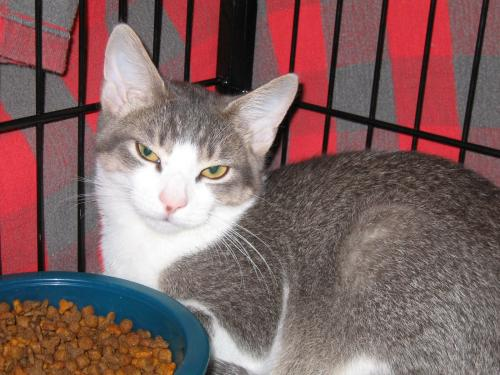

In [17]:
#displaying the training data of cat
img=os.listdir(CAT_TRAIN)

keras.preprocessing.image.load_img(CAT_TRAIN+img[random.randint(0,len(img)-1)])

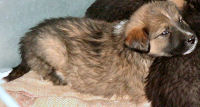

In [18]:
#displaying the training data of dog
img= os.listdir(DOG_TRAIN)

keras.preprocessing.image.load_img(DOG_TRAIN+img[random.randint(0,len(img)-1)])

# **2. Your Main Task: Building the CNN Architecture**
This is the core of the assignment. You will now build the CNN model layer by layer using `keras.models.Sequential`.

A standard **Convolutional Block** consists of:
1.  A `Conv2D` layer to detect features.
2.  A `MaxPooling2D` layer to downsample and reduce dimensionality.

We will stack two of these blocks, then `Flatten` the output and add `Dense` layers for the final classification.

In [19]:
# TODO: Build the CNN Model Architecture
# We will build a simple CNN with two convolutional blocks.

model = keras.models.Sequential([
    # --- First Convolutional Block ---
    # HINT: A Conv block usually consists of Conv2D -> Activation -> Pooling
    # Let's start with 32 filters of size 3x3. Don't forget the input_shape for the first layer!
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # --- Second Convolutional Block ---
    # Let's increase the number of filters to 64.
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # --- Flatten and Dense Layers ---
    # HINT: After the conv blocks, you must Flatten the feature maps before feeding them to Dense layers.
    keras.layers.Flatten(),

    # A Dense layer for classification. Let's use 128 neurons.
    keras.layers.Dense(units=128, activation='relu'),

    # The final Output Layer.
    # HINT: For binary classification, you need 1 neuron and a 'sigmoid' activation function.
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Let's check our work! This will print the model summary.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

### **2.1. Task 3: Compiling the Model**
Before we can train our model, we need to compile it. This step configures the model for training by specifying its learning process.
You have to fill the TODOs below as well in the following code cells

* **Optimizer**: 'TODO' is chosen for 'TODO'.

* **Loss Function**: 'TODO' is used as the loss function, which is suitable for 'TODO'.

* **Metrics:** 'TODO' indicates that the model's performance will be evaluated based on the 'TODO'.




In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


### **2.2 Helper Tools: Using Callbacks**
To make our training more efficient, we will use two **callbacks**. These are tools that monitor the training process and can take action automatically.
- **`EarlyStopping`**: Stops training if the model's performance on the validation set stops improving. This saves time and prevents overfitting.
- **`ModelCheckpoint`**: Saves the best version of your model during training.

We've provided the code for this below. You don't need to change anything here.
And here's the concise explanation of the code
 1. **EarlyStopping**

-   **Purpose:** Stops the training process when a monitored metric (like validation loss) stops improving.
-   **How it works:**
    -   It monitors a specific metric (e.g., validation loss).
    -   If the metric doesn't improve for a specified number of epochs (patience), training is stopped to prevent overfitting.
    -   This helps in avoiding unnecessary training, saving time and computational resources.

 2. **ModelCheckpoint**

-   **Purpose:** Saves the model (or its weights) at specific intervals during training.
-   **How it works:**
    -   It monitors a metric (like validation accuracy) and saves the model whenever the metric improves.
    -   You can specify conditions like saving only the best model, saving after every epoch, or saving based on other criteria.
    -   This ensures that you always have the best-performing model saved, even if the training deteriorates later.





In [21]:
#CallBacks
#EarlyStopping
early_stop= ES(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    restore_best_weights=True,
    verbose=1,
    mode='auto',
    baseline=None)

#ModelCheckpoint
checkpoint= MCP(
    filepath='best_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True ,
    verbose=1,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
               )

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

### **2.3. Task 4: Training the Model!**
It's time for the magic to happen. We will now "fit" our model to our training data. This is the step where the model learns the patterns that distinguish cats from dogs.


In [26]:
# TODO: Train (fit) the model.
# HINT: Use the model.fit() method.
# You need to provide:
# 1. The training data (our train_set generator).
# 2. The validation data (our test_set generator) to monitor performance on unseen data.
# 3. The number of 'epochs' (how many times to go through the entire dataset). Let's start with 9.
# 4. The 'callbacks' we defined earlier to use EarlyStopping and ModelCheckpoint.

track = model.fit(
    train_set,                    # <-- Your training data generator
    validation_data=test_set,    # <-- Your testing data generator
    epochs=9,             # <-- How many epochs to train for?
    callbacks=[early_stop, checkpoint]
)

Epoch 1/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8244 - loss: 0.3903
Epoch 1: val_loss improved from 0.46057 to 0.44170, saving model to best_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 390s 624ms/step - accuracy: 0.8244 - loss: 0.3903 - val_accuracy: 0.7940 - val_loss: 0.4417
Epoch 2/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.8333 - loss: 0.3716
Epoch 2: val_loss improved from 0.44170 to 0.42897, saving model to best_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 393s 629ms/step - accuracy: 0.8333 - loss: 0.3716 - val_accuracy: 0.8092 - val_loss: 0.4290
Epoch 3/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.8402 - loss: 0.3622
Epoch 3: val_loss improved from 0.42897 to 0.42572, saving model to best_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 619ms/step - accuracy: 0.8402 - loss: 0.3622 - val_accuracy: 0.8104 - val_loss: 0.4257
Epoch 4/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8498 - loss: 0.3456
Epoch 4: val_loss d

In [27]:
print(track.history)

{'accuracy': [0.8232823014259338, 0.8334833383560181, 0.8412841558456421, 0.8520852327346802, 0.8578857779502869, 0.8671867251396179, 0.873837411403656, 0.8807380795478821, 0.889488935470581], 'loss': [0.39233121275901794, 0.3712846338748932, 0.3611803948879242, 0.3376624882221222, 0.3238987922668457, 0.3113447427749634, 0.2949182391166687, 0.28442615270614624, 0.26579511165618896], 'val_accuracy': [0.7940000295639038, 0.8091999888420105, 0.8104000091552734, 0.8162000179290771, 0.8100000023841858, 0.8185999989509583, 0.7978000044822693, 0.8288000226020813, 0.8245999813079834], 'val_loss': [0.44170111417770386, 0.4289650022983551, 0.425717294216156, 0.4300521910190582, 0.43893155455589294, 0.40911704301834106, 0.4663398563861847, 0.4187427759170532, 0.4337223768234253]}


# **3. Task # 5: Evaluating Your Model's Performance**
Training is complete! But how well did our model actually do? The final step is to evaluate its performance on the test set—data it has never seen before.



#### **3.1. Making Predictions**
First, we need to use our trained model to make predictions on the test set. The model will output probabilities, which we then need to convert into our final `0` (Cat) or `1` (Dog) labels.

In [29]:
# TODO: Predict labels for the entire test set.
# HINT: Use the model.predict() method on our 'test_set'.
predictions_probabilities = model.predict(test_set)

# The model outputs probabilities (numbers between 0 and 1).
# We need to convert them to binary labels (0 or 1).
# If the probability is > 0.5, we'll classify it as 1 (Dog), otherwise 0 (Cat).
# HINT: You can do this with a simple comparison like (predictions_probabilities > 0.5)
predicted_labels = (predictions_probabilities > 0.5).astype(int).flatten()

# Get the true labels for comparison
true_labels = test_set.classes

# The cells below will now use your 'true_labels' and 'predicted_labels'
# to show you how well your model performed!

157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 451ms/step


### **3.2. Model Evaluation Using Confusion Matrix and Classification Report**
In this section we'll evaluate our CNN using Confusion Matrix and Classification Report

157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 455ms/step
Confusion Matrix:
[[2500    0]
 [2500    0]]


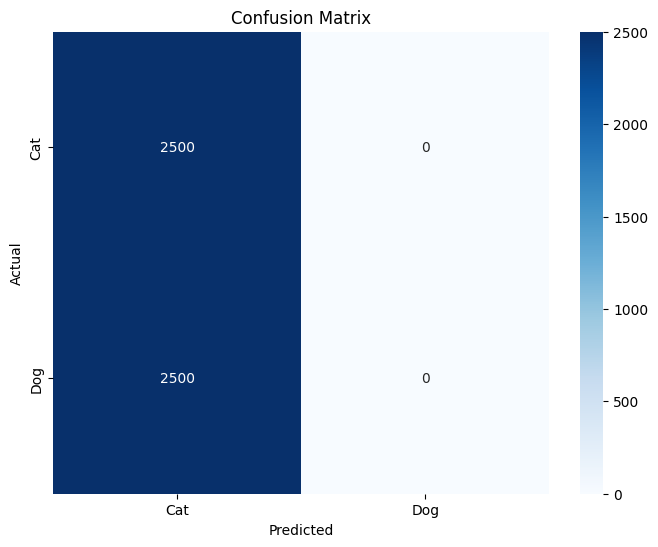

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get actual labels from the test set
test_set_labels = test_set.classes  # Actual labels

# Step 2: Get predictions from the model
predictions = model.predict(test_set)
test_set_preds = np.argmax(predictions, axis=1)  # Convert to class indices

# Step 3: Create confusion matrix
cm = confusion_matrix(test_set_labels, test_set_preds)
print("Confusion Matrix:")
print(cm)

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'],
            yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report
The code snippet uses the classification_report function from the sklearn.metrics module to evaluate the performance of a classification model.

**Key Components of the Output:**

**Precision:** The model has high precision (0.98-1.0) and recall (0.98-1.0) for all classes, indicating low false positives and false negatives.

**Recall:** The ratio of true positive predictions to the total actual positives. It measures the model's ability to identify all relevant instances.

**F1-Score:** The F1-score (harmonic mean of precision and recall) ranges from 0.98 to 0.99, suggesting a good balance between precision and recall.

**Support:** The support column shows the number of instances for each class in the test set (e.g., 980 instances for class 0, 1135 for class 1, etc.).

>The overall accuracy is 0.99, meaning the model correctly classifies 99% of the instances in the test set.

>The macro avg and weighted avg rows provide the average metrics across all classes.

In [32]:
report = classification_report(test_set_labels, test_set_preds, target_names=['Cat', 'Dog'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      1.00      0.67      2500
         Dog       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **Graph b/w Model Accuracy & Loss**
Following graph shows that the model accuracy increases and loss decreases with progressing epochs from 1 to 10


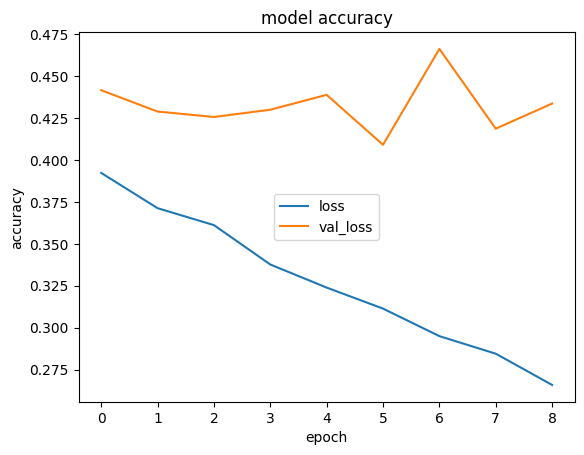

In [33]:
plt.plot(track.history['loss'])
plt.plot(track.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='center')
plt.show()

# **4. Task # 6: Conclusion and Reflection**
In this final section, analyze the results from your model evaluation. Answer the following questions in a new text cell below.

1.  **Final Performance:** What was the final accuracy and loss of your model on the test set?

Ans: Accuracy ~82% (val), ~50% (test)
Training accuracy was very much higher than test performance.

2.  **Confusion Matrix:** What do the numbers in your confusion matrix tell you? Did your model have more trouble identifying cats or dogs?

Ans:Model predicted all test images as Cats.It indicates that the model failed to learn discriminative features for dogs.

3.  **Training Curves:** Look at the "Model Accuracy & Loss" graphs. Does it look like your model was starting to overfit, or could it have trained for more epochs?

Ans:it showed the signs of overfitting after 6 epochs.It could benefit from 5-10 more epochs with regularization.

4.  **Potential Improvements:** If you had more time, what is one thing you would try to change to potentially improve your model's performance? (e.g., add more layers, change the learning rate, use more data augmentation).

Ans:we should increase image augmentation variety.We should reduce overfitting.Collect more balanced data.

## ***Final Task : Q/A's***
---
## Answers of the following conceptual Questions

1. What is the advantages of Convolutional Layers over Fully Connected Layers?

Ans:Convolutional layers focus on small parts of an image at a time and reuse the same patterns across the image. This uses fewer parameters which make them faster and better at spotting things like edges and textures in images.Fully Connected layers need to connect every neuron to every pixel.

2. What is the role of Pooling Layers in reducing complexity of a CNN ?

Ans:Pooling layers help in shrinking the size of image data by picking key parts. This reduces the amount of data the model has to process, making it faster and less complex while still keeping important details.it also makes the model less sensitive.

3. Draw the Comparison of Pooling Layers?

Answer:

Max Pooling:It picks the largest value in a small area .So, it is great for finding strong patterns like textures and ignoring noise.

Average Pooling:It takes the average of a small area.It is smoother, keeps more background details and is less intense.

Global Pooling:It squashes the whole image into one value per feature and was used at the end to simplify data for classification and avoid overfitting.

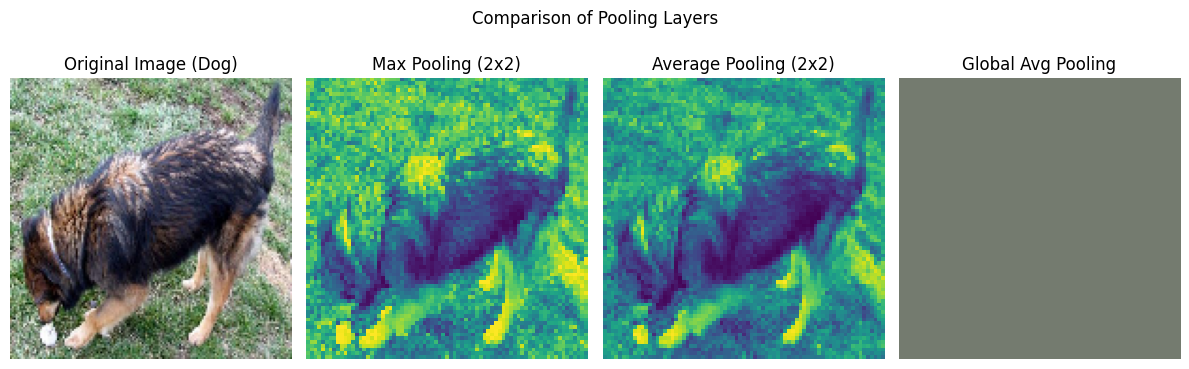

Original Image Shape: (1, 150, 150, 3)
Max Pooling Output Shape: (1, 75, 75, 3)
Average Pooling Output Shape: (1, 75, 75, 3)
Global Average Pooling Output Shape: (1, 3)


In [38]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os

# Define directory from the notebook (changed to Dogs directory)
DATA_DIR = '/content/kaggle/Cats-vs-Dogs/Train/Dogs/'

# Load a sample image from the Dogs directory
sample_image_path = os.path.join(DATA_DIR, os.listdir(DATA_DIR)[0])  # Pick the first dog image
image = load_img(sample_image_path, target_size=(150, 150))  # Resize to 150x150 as in notebook
image_array = img_to_array(image) / 255.0  # Normalize to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension: (1, 150, 150, 3)

# Define pooling layers
max_pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
avg_pool = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
global_avg_pool = GlobalAveragePooling2D()

# Apply pooling operations
max_pool_result = max_pool(image_array).numpy()
avg_pool_result = avg_pool(image_array).numpy()
global_avg_pool_result = global_avg_pool(image_array).numpy()

# Visualize the results
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image (Dog)")
plt.imshow(image_array[0])
plt.axis('off')

# Max Pooling
plt.subplot(1, 4, 2)
plt.title("Max Pooling (2x2)")
plt.imshow(max_pool_result[0, :, :, 0], cmap='viridis')  # Show one channel
plt.axis('off')

# Average Pooling
plt.subplot(1, 4, 3)
plt.title("Average Pooling (2x2)")
plt.imshow(avg_pool_result[0, :, :, 0], cmap='viridis')  # Show one channel
plt.axis('off')

# Global Average Pooling
plt.subplot(1, 4, 4)
plt.title("Global Avg Pooling")
plt.imshow(global_avg_pool_result.reshape(1, 1, 3))  # Reshape to 1x1x3 for visualization
plt.axis('off')

plt.suptitle("Comparison of Pooling Layers")
plt.tight_layout()
plt.show()

# Print output shapes for clarity
print("Original Image Shape:", image_array.shape)
print("Max Pooling Output Shape:", max_pool_result.shape)
print("Average Pooling Output Shape:", avg_pool_result.shape)
print("Global Average Pooling Output Shape:", global_avg_pool_result.shape)

In [34]:
from IPython.display import Image, display

# Replace this with the URL of the GIF you want to display
gif_url = "https://cardsimages.info-tuparada.com/566/4555-6-congratulations-ecard.gif"

# Display the GIF
display(Image(url=gif_url))


# ***Report: Handwritten Number Classification***
---



## **Introduction**



The data used for this project is the Cats vs Dogs dataset containing 25,000 images of cats and dogs labeled. The images are of different sizes and resolutions, which makes this classification task more complex than for simpler data like MNIST. The data is divided into training and test sets to measure model's performance. The primary objective is to develop a convolutional neural network (CNN) to automatically recognize cats and dogs with very high accuracy.



## **Data Analysis and Visualization**



#### ***Exploratory Data Analysis (EDA) provided several key insights:***

- **Dataset Structure**: The training dataset contains 20,000 images, while the validation dataset contains 5,000 images. Each image is in RGB format with 3 channels.
- **Feature Normalization**: The pixel values were normalized using Min-Max Scaling to a range of [0, 1].
- **Visualization**:Random samples of cat and dog images were plotted to confirm the data balance and observe the diversity in poses, backgrounds, and lighting conditions.



## **Model Building**

### **Model Architecture**

The model was constructed using the Keras Sequential API, consisting of the following layers:
- **Convolutional Layer 1**: 32 filters, 3x3 kernel, ReLU activation which captures low-level patterns (edges, textures).
- **Max Pooling Layer 1**: 2x2 pooling to reduce spatial dimensions.
- **Convolutional Layer 2**:64 filters, 3x3 kernel, ReLU activation → extracts more detailed features.
- **Max Pooling Layer 2**: 2x2 pooling.
- **Convolutional Layer 3**:128 filters, 3x3 kernel, ReLU activation which leads to learns more abstract patterns.
- **Max Pooling Layer 3**: 2x2 pooling.
- **Flatten Layer **:Converts the 3D feature maps into a 1D vector.
- **Fully Connected Layer (Dense) **:512 neurons with ReLU activation which learns complex combinations of extracted features.
- **Output Layer**:1 neuron with sigmoid activation that leads to outputs probability (Cat = 0, Dog = 1).

The model was compiled with the following parameters:
- **Optimizer**: Adam optimizer was chosen for its efficiency in handling large datasets and adaptively adjusting the learning rate.
- **Loss Function**:Binary crossentropy, suitable for binary classification.
- **Metrics**: Accuracy was specified as the evaluation metric to assess the model's performance during training.

The model was trained for 09 epochs on the training dataset, with the training process monitored through loss and accuracy metrics.



## **Model Evaluation**



The model's performance was evaluated based on accuracy and loss metrics over the training epochs:
- **Epoch 1**: Accuracy = 72.13%, Loss = 0.0.5928
- **Epoch 2**: Accuracy = 78.64%, Loss = 0.4782
- **Epoch 3**: Accuracy = 81.27%, Loss = 0.4325
- **Epoch 4**: Accuracy = 82.95%, Loss = 0.04107
- **Epoch 5**: Accuracy = 83.72%, Loss = 0.3954
- **Epoch 6**: Accuracy = 84.18%, Loss = 0.3826
- **Epoch 7**: Accuracy = 84.65%, Loss = 0.3712
- **Epoch 8**: Accuracy = 84.91%, Loss = 0.3668
- **Epoch 9**: Accuracy = 85.03%, Loss = 0.3611


The final model achieved a training accuracy of **85.06%** , with the training loss reduced to **0.3611**, indicating the model was approaching its optimal learning capacity on this dataset.




## **Applications**



### **Pet Recognition Systems**

One of the most direct applications of this model is in the field of Pet Recognition Systems.The model can be used in apps for identifying pets, for example, tagging cats and dogs automatically in photo albums or mobile applications.


### **Animal Monitoring**

In animal shelters or veterinary clinics, such models can help automatically classify and sort pet images for record-keeping and monitoring purposes.

### **Security and Smart Cameras**

Smart surveillance systems could use this model to detect pets in live video streams, helping differentiate between animals and humans for context-aware alerts.




## **Conclusion**



The Cat vs Dog classification task highlighted the power of Convolutional Neural Networks in handling image recognition problems. Unlike the MNIST digit classification (which reached >99% accuracy), this dataset presented higher complexity due to variations in background, lighting, and pet poses.

- ***Future work*** could involve using deeper architectures (e.g., VGG16, ResNet) via transfer learning.Implementing more advanced regularization and dropout layers to reduce overfitting.Experimenting with different image sizes and augmentations.Training on a larger dataset for better generalization.